# Kings County Housing Prices Bakeoff
-- Lhamu Tsering

---

## Overview

This project conducts an analysis on the Seattle, Washington, Kings County Houses attributes data to create a model that will make the best prediction of the price of a house. House prices depend on a lot of factors like the house characteristics, economic environment, housing market, neighborhood, neighboring houses, proximity to amenities etc. According to an article on [Opendoor](https://www.opendoor.com/w/blog/factors-that-influence-home-value) the depending variables can be boiled down to eight critical factors; neighborhood comps, location, home size and usable space, age and condition, upgrades and updates, local market, economic indicators and interest rates.The project will use intuition, statistical methods and python to build the best model, to predict house prices.

## Loading Libraries and Project Data

In [1]:
#Importing necessary libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the test and working datasets
df1 = pd.read_csv('kc_house_data_train.csv', index_col=0)

## Data Understanding

***Exploratory Data Analysis -***
The initial step is to understand the data. Becoming familiar with the data is a foundational step to model building. Here, we will examine data behind the target and each of the feature variables. Relationships between the features and the target variables, as well as relationship between the feature variables will also be examined. Information on the desccription of features on which data was collected can be found [here]('http://localhost:8888/README.md') --- check this link in Github

In [3]:
df1.shape
# The working data set has 17290 observation or houses and 21 features

(17290, 21)

In [4]:
# looking at what features are present in the working data set
# Also checking for any missing values as well as the datatypes of the features
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


From the data information output, it can be observed that there are no *Nan* values. All the variables are of either *int* dtype or *float* dtype. The sale `date` is the only object datatype.

In [5]:
#checking for null values in data
df1.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
# setting display options so that all columns are displayed
pd.set_option('display.max_columns', None)

# previewing data in the working data set
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
# generating descriptive statistics on the working data to understand the data better
# the summary output is generated in regular format and not in scientific notation
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4565501756.436553,540739.548641,3.372470,2.111943,2081.464604,15243.399884,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2874655595.362363,373318.978749,0.939346,0.770476,920.018539,42304.623788,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,572.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2114700558.750000,321000.000000,3.000000,1.500000,1430.000000,5081.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3903650042.500000,450000.000000,3.000000,2.250000,1920.000000,7642.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7301150051.500000,645000.000000,4.000000,2.500000,2550.000000,10725.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


From the **descriptive analysis**, we can make the following observations of the working data set, that will need to be examined further.

* **bedrooms:** the min is 0. All houses generally should have bedrooms. This could be a case of missing value
* **bedrooms:** the max is 33. The square footage of this house will have to be looked at, to affirm this makes sense. This could also be a case of mistype.
* **bathrooms:** the min is 0. All houses have at least 1 bathroom. This could be a case of missing value.
* **floors:** The number of floors seems to be a float with .5. In [real-estate definition](https://www.gimme-shelter.com/what-is-a-1-5-storey-house-50104/#:~:text=A%20one%2Dand%2Da%2D,a%20%E2%80%9Chalf%20storey%20house%E2%80%9D.) a 1.5 storey house means that the house has a floor that only spans half the size of the main floor. The data is valid here.
* **waterfront:** the max is 1. The value is 0 at 25%, 50% and 75%. This makes sense since this variable is a dummy. Houses that have a waterfront view have a value of  1 and for no waterfront view the value is 0.
* **view:** the max is 4 but the value is 0 at 25%, 50% and 75%. This tells me that some houses seem to have a view rating of even 0.
* **sqft_basement:** the values at the 25th and 50th percentile is 0. This could mean that only some houses have basements and others don't.
* **yr_renovated:** The value is 0 at 25%, 50% and 75%. This could mean that some house were never renovated once built.

In [8]:
# looking at the number of unique values in the data for each feature
df1.nunique(axis=0)

id               17176
date               371
price             3534
bedrooms            13
bathrooms           30
sqft_living        947
sqft_lot          8428
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         867
sqft_basement      290
yr_built           116
yr_renovated        69
zipcode             70
lat               4837
long               733
sqft_living15      714
sqft_lot15        7582
dtype: int64

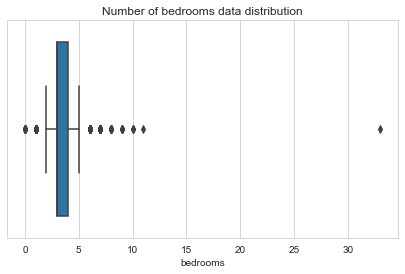

In [9]:
# Visualizing outliers in the 'bedrooms' feature
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df1['bedrooms'],linewidth=1.5);
plt.title('Number of bedrooms data distribution');

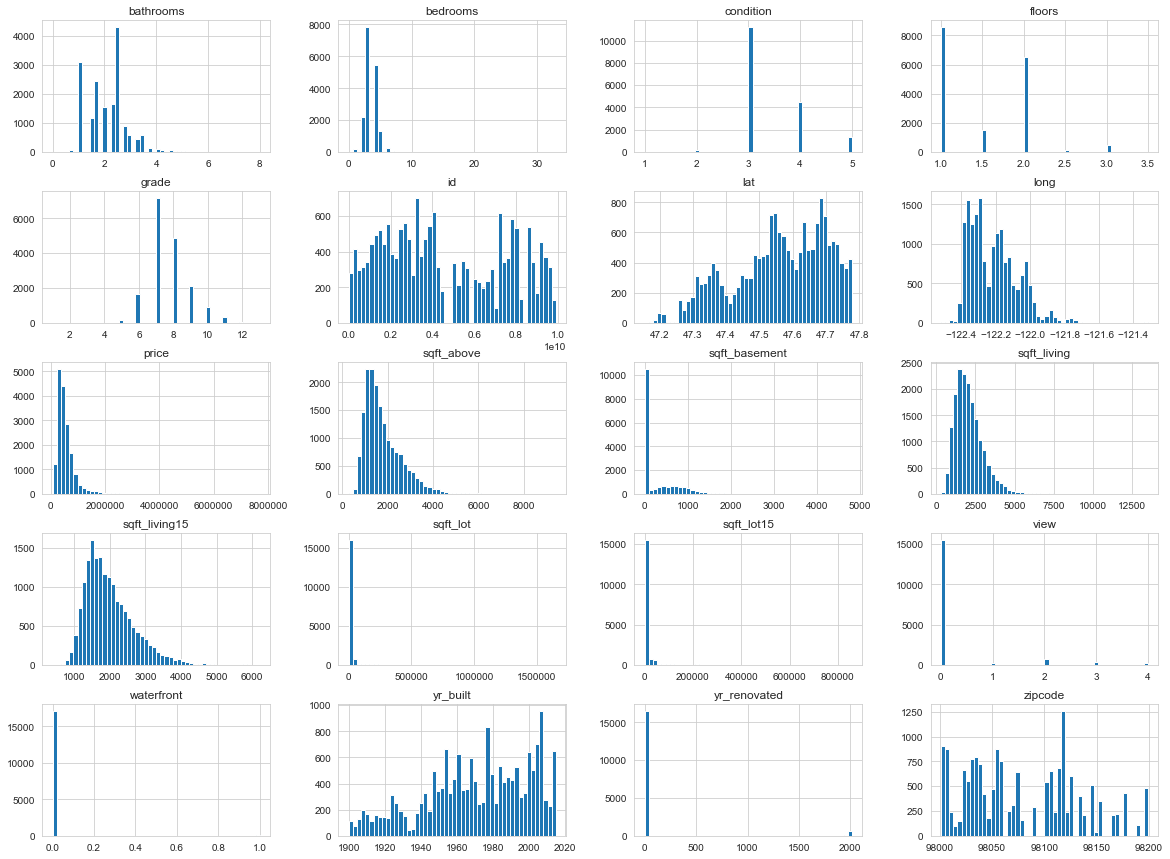

In [10]:
# examining the distribution of data for all variables in the data
df1.hist(bins=50, figsize=(20,15))
plt.show()

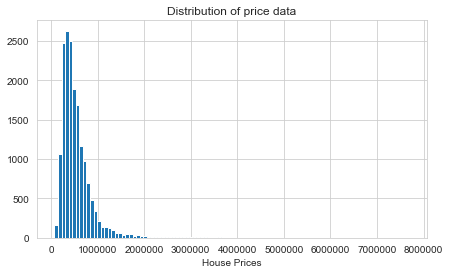

In [11]:
# examining the target variable data distribution
fig, ax = plt.subplots(figsize = (7,4))
ax.hist(df1['price'], bins = 100);
ax.set_title('Distribution of price data')
ax.set_xlabel('House Prices');

The distribution of the price data is slightly skewed to the right with a trailing tail extending far from the mean of the dataset. Next I looked to check on how the distribution responded to a log value of price.

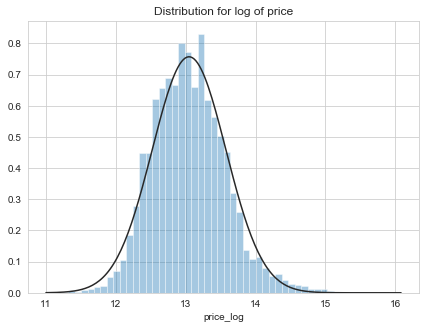

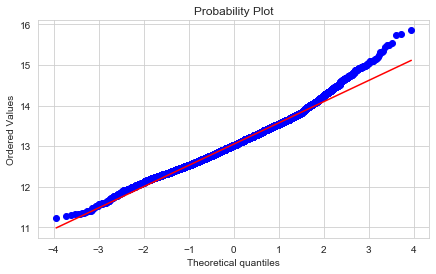

In [12]:
# log transformation of target
df1['price_log'] = np.log(df1['price'])

# transformed target histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
fig = plt.figure(figsize = (7,5))
sns.distplot(df1['price_log'], fit=norm,  bins=50, kde=False);
plt.title('Distribution for log of price')

fig = plt.figure(figsize = (7,4))
res = stats.probplot(df1['price_log'], plot=plt)

Log transforming the price data, allows for a more normally distribution.

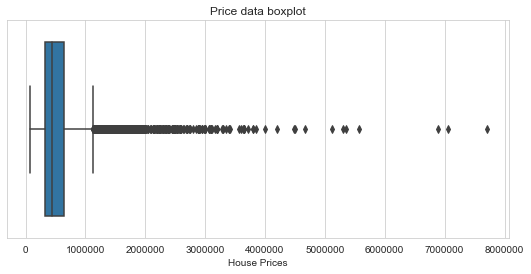

In [13]:
# Checking on the scatter of data and looking for outliers
fig = plt.figure(figsize = (9,4))
sns.boxplot(df1['price'])
plt.title('Price data boxplot')
plt.xlabel('House Prices');

Few of the price datapoints fall far from the average house price in the dataset. The right skewed distribution of data can also be observed here.

In [14]:
#number of houses with prices over $3,000,000
len(df1[df1['price'] >= 3000000])

47

In [15]:
# looking at proportions of data in floors 
df1['floors'].value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [16]:
# looking at the proportion of houses with waterfront view
df1['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [17]:
# looking at proportion of houses with different view ratings
df1['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [18]:
#looking at the proportion of house condition at different levels
df1['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [19]:
# looking at data proportion on the grade variable 
df1['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [20]:
#examining VIF scores

df_vif = df1._get_numeric_data() #to get only the numeric columns

#dropping target variable and irrelevant id var from test
predictors= df_vif.drop(columns=['id', 'price']) 

vif = pd.DataFrame()

#calculates VIF scores and formats output to two decimal points
vif['VIF'] = [format(variance_inflation_factor(predictors.values, i), '.2f') for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

vif


,VIF,features
0,22.50,bedrooms
1,28.81,bathrooms
2,inf,sqft_living
3,2.27,sqft_lot
4,17.00,floors
5,1.24,waterfront
6,1.60,view
7,35.20,condition
8,171.95,grade
9,inf,sqft_above


There is a high degree of multicollinearity for many of the features in the dataset.

In [21]:
# examining the measure of the degree of correlation between all variables
df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,-0.002317
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.886244
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665,0.343370
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.551547
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.696895
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.097651
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.312198
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.183123
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,0.346461
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,0.040469


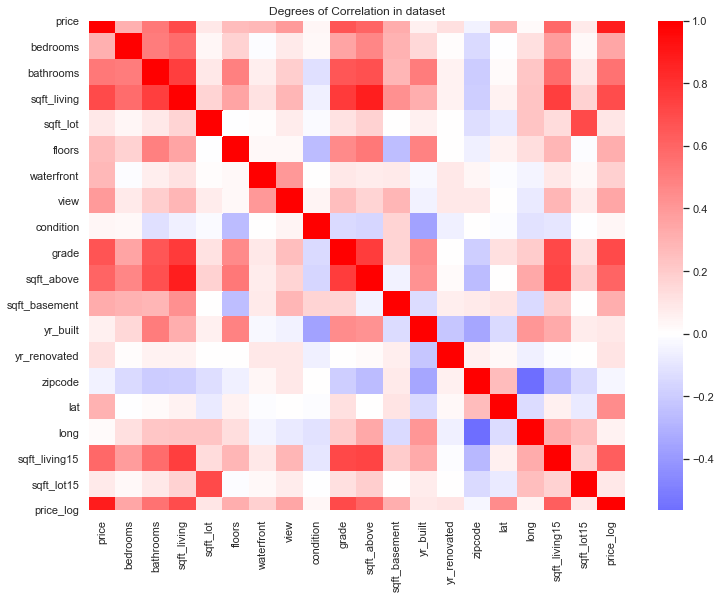

In [22]:
# generating a visual preview of correlation information between all variables
corr = df1.drop(columns = ['id']).corr()

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, \
            annot=False, cmap='bwr', center= 0)
plt.title('Degrees of Correlation in dataset');

***Data Cleaning -*** Before model building, any issues identified during the exploratory data analysis process must be resolved.

In [23]:
# checking the number of observations affected with the issue
df1.loc[(df1['bathrooms'] == 0) | (df1['bedrooms'] == 0)].shape

(14, 22)

There are 14 rows of observations where the `bathrooms`  or `bedrooms` is 0. The information of the house for these features seem to be missing. Since, removing them is not a viable option as the test set also contains similar issues, we will examine the distribution and impute the mean to that zero value.

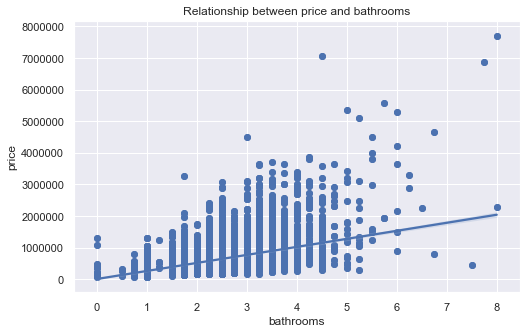

In [24]:
#visual examination of price and bathrooms
x1 = df1['bathrooms']
y1 = df1['price']
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x1, y1);
ax.set_title('Relationship between price and bathrooms')
sns.regplot(x1, y1);

In [25]:
# imputing mean to the zero values in the dataset
df1.loc[df1['bathrooms']== 0, 'bathrooms'] = df1['bathrooms'].mean()

In [26]:
# confirming no zero values
df1.loc[df1['bathrooms']==0].shape

(0, 22)

In [27]:
# descriptive information on updated feature data
df1['bathrooms'].describe()

count    17290.000000
mean         2.112921
std          0.769135
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

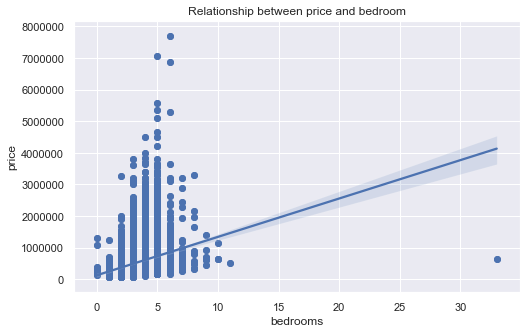

In [28]:
x1 = df1['bedrooms']
y1 = df1['price']
fig, ax = plt.subplots( figsize = (8,5))
ax.scatter(x1, y1)
ax.set_title('Relationship between price and bedroom')
sns.regplot(x1, y1);

In [29]:
# imputing mean to the zero values in the working and test data
df1.loc[df1['bedrooms']== 0, 'bedrooms'] = df1['bedrooms'].mean()

# confirming no zero values in working data
df1.loc[df1['bedrooms']==0].shape

(0, 22)

In [30]:
# Examining the observation with 33 bedrooms
# Outlier also observed in the relationship figure above
df1[df1['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
8597,2402100895,20140625T000000,640000.0,33.0,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,13.369223


In [31]:
df1['bedrooms'].median()

3.0

In [32]:
# previewing observations with 3 bedrooms to compare
df1[df1['bedrooms']== 3].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
3,9522300010,20150331T000000,1490000.0,3.0,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287
4,9510861140,20140714T000000,711000.0,3.0,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428
7,7010701383,20141017T000000,680000.0,3.0,2.5,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,13.429848
8,291310170,20140804T000000,384500.0,3.0,2.5,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,12.859699
10,6840701125,20150422T000000,638000.0,3.0,1.0,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400,13.366094


In comparing data on the square footage of the houses with 3 bedrooms versus the house with 33 bedrooms, it can be seen that the house with 33 bedrooms in not very large in size. Infact a similar house with 1600sqft of `sqft_living` has 3 bedrooms. Based on this and the assumption that 33 bedrooms is a typo, I updated the value with the median of 3 bedrooms for that house.

In [33]:
# Updating mistyped data with median
df1.loc[df1['bedrooms'] >= 12, 'bedrooms'] = df1['bedrooms'].median()

In [34]:
# Isolating the date information in the string dtype date
df1['date'] = df1['date'].apply(lambda x: (x[:8]))

# converting date to float and then date format
df1['date'].astype(float)

# updating date column to date format in new column
df1['date2']= pd.to_datetime(df1['date'], format='%Y/%m/%d') 

df1.drop(columns = ['date'], inplace = True) # dropping object type date column  

The object type data column is removed since it cannot be used in the model. 

In [35]:
# defining the original features before any transformations in the data set
df_orig_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

## Statistical tests

To gain more insight on the data, some statistical tests were performed

In [36]:
# Setting up formula to test significance of variables view and waterfront
formula = 'price~view+waterfront'

#Creating OLS model with formula on df1
lm = ols(formula, df1).fit()

#Generating ANOVA statistic table
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq       df            F        PR(>F)
view        2.315590e+14      1.0  2006.793454  0.000000e+00
waterfront  3.794326e+13      1.0   328.833183  8.159286e-73
Residual    1.994705e+15  17287.0          NaN           NaN


From the p-values in the ANOVA summary table we can tell that at an alpha of 0.05 both the independent variables `view` and `waterfront` was statistically significant in explaining house prices in Kings County. From the model, `view` is a better estimator or price than `waterfront'

In [37]:
formula = 'price=bedrooms+bathrooms+bathroomsbedrooms'

## Feature Engineering 

It is possible to generate new features through transformations or interactions that might help explain the target better. Following are some possible interaction features that could be important

1. **bathroom/bedroom** --- Number of bathrooms per bedroom 
2. **bathroom/ floor** --- Number of bathrooms per floor 
3. **bathroom/ sqft-living** --- Number of bathrooms per sqft of living space in house 
4. **age** --- Age of the house in 2020 based on yr-built 
5. **sqft_living/sqft_above**--- Proportion of living or usable space available
6. **(sqft_above + sqft_basement)/ floor** --- avg sqft per floor 
7. **sqft_lot - sqft/floor** --- square foot size of available outside open space
8. **sqft_living - sqft_above** ---square foot size of other possible spaces under the roof (like garage etc)

In [38]:
# generating new feature 1
df1['bath_per_bed'] = df1['bathrooms']/ df1['bedrooms']
df1['bath_per_bed'].corr(df1['price'])

# generating new feature 2
df1['bath_per_flr'] = df1['bathrooms']/ df1['floors']
df1['bath_per_flr'].corr(df1['price'])

# generating new feature 3
df1['bath_per_sqftliv'] = df1['bathrooms'] / df1['sqft_living']
df1['bath_per_sqftliv'].corr(df1['price'])

# generating new feature 4
df1['age'] = 2020 - df1['yr_built']
df1['age'].corr(df1['price'])

# generating new feature 5
df1['use_prop'] = df1['sqft_living']/ df1['sqft_above']
df1['use_prop'].corr(df1['price'])

# generating new feature 6
df1['sqft_per_flr'] = (df1['sqft_above'] + df1['sqft_basement'])/df1['floors']
df1['sqft_per_flr'].corr(df1['price'])

# generating new feature 7
df1['outside_space'] = df1['sqft_lot'] - df1['sqft_per_flr']
df1['outside_space'].corr(df1['price'])

# generating new feature 8
df1['other_space'] = df1['sqft_living'] - df1['sqft_above']
df1['other_space'].corr(df1['price'])


0.32331176808688505

The observed correlation for the new features to target variable is below. 
1. `bath_per_bed` to `price`  --- **0.2784** Moderately correlated with price
2. `bath_per_flr` to `price` --- **0.2402** Moderately correlated with price
3. `bath_per_sqftliv` to `price` --- -0.2655. This intuitively does not make sense.
4. `age` to `price` --- -0.05645 Weak correlation with price
5. `use_prop` to `price` --- 0.1093 Weak correlation with price
6.`sqft_per_flr` to `price` --- **0.4334** moderate to strong correlation with price
7. `outside_space` to `price` --- 0.08 Weak correlation with price
8. `other_space` to `price` --- **0.3233** Moderately correlated with price

In [39]:
# dropping feature that does not make intuitive sense based on correlation
df1.drop(columns = 'bath_per_sqftliv', inplace = True)

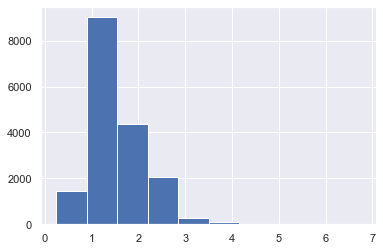

In [40]:
x1 = df1['bath_per_flr']
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(x1);

In [41]:
df1['bath_per_flr'].describe()

count    17290.000000
mean         1.505232
std          0.573514
min          0.250000
25%          1.000000
50%          1.250000
75%          1.750000
max          6.750000
Name: bath_per_flr, dtype: float64

**Some more new feature** tests- on the following variables
1. condition - binning house condition to three categories
2. grade - binning grade to three categories
3. sqft_basement -  only some house have sqfootage meaning only those houses have a basement. Creating dummy for have or not have a basement
4. yr_renovated - only some houses have renovation year, meaning only those houses have upgrades or renovation done. Creating dummy for have or not have renovation.
5. The quarter of the year the house was sold in
6. The month of the year the house was sold in

In [42]:
# generating new basement feature with 1 for has basement and 0 for not
df1['basement'] = df1['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,age,use_prop,sqft_per_flr,outside_space,other_space,basement
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,34,1.000000,1035.0,7858.0,0,0
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,43,1.584699,2900.0,3830.0,1070,1
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,23,1.000000,1885.0,9008.0,0,0
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,30,1.000000,2280.0,12328.0,0,0
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,16,1.000000,1275.0,4101.0,0,0


In [43]:
# generating new renovated feature with 1 for has renovation and 0 for not
df1['renovated'] = df1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,34,1.000000,1035.0,7858.0,0,0,0
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,43,1.584699,2900.0,3830.0,1070,1,0
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,23,1.000000,1885.0,9008.0,0,0,0
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,30,1.000000,2280.0,12328.0,0,0,0
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,16,1.000000,1275.0,4101.0,0,0,0


In [44]:
# binning the grade data to 3 levels of quality in a new feature design_grade
conditions = [
    df1['grade'] <= 4,
    df1['grade'] >= 10
]

choices = [
    'low_quality',
    'high_quality'
]
df1['design_grade'] = np.select(conditions, choices, default = 'ave_quality')

df1['design_grade'].head()

0     ave_quality
1     ave_quality
2    high_quality
3    high_quality
4     ave_quality
Name: design_grade, dtype: object

In [45]:
# generating dummy variable on the design_grade variable
df1['design_grade'].value_counts()

ave_quality     15970
high_quality     1295
low_quality        25
Name: design_grade, dtype: int64

Majority of houses are of average design quality with `grade` between 5 to 9. 

In [46]:
#generating dummy variables on the design_grade feature
dummy1 = pd.get_dummies(df1['design_grade'])

In [47]:
dummy1.head()

,ave_quality,high_quality,low_quality
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [48]:
# dropping the variable from which dummies created. cannot have both
df1.drop(columns = ['design_grade'], inplace = True)

In [49]:
# checking the proportion of data at each quality level 
df1['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [50]:
# binning the condition data to 3 levels of house condition in a new feature status
conditions = [
    df1['condition'] == 1,
    df1['condition'] >= 4
]

choices = [
    'low',
    'high'
]
df1['status'] = np.select(conditions, choices, default = 'ave')

df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,date2,bath_per_bed,bath_per_flr,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated,status
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,2014-10-06,0.562500,1.125,34,1.000000,1035.0,7858.0,0,0,0,high
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,2014-08-21,0.600000,3.000,43,1.584699,2900.0,3830.0,1070,1,0,high
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,2014-08-15,0.625000,1.250,23,1.000000,1885.0,9008.0,0,0,0,ave
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,2015-03-31,1.166667,1.750,30,1.000000,2280.0,12328.0,0,0,0,ave
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,2014-07-14,0.833333,1.250,16,1.000000,1275.0,4101.0,0,0,0,ave


In [51]:
df1['status'].value_counts()

ave     11383
high     5883
low        24
Name: status, dtype: int64

Majority of the houses are in excellent status with condition ratings of 4 or 5. 

In [52]:
#generating dummy variables on the status feature
dummy2 = pd.get_dummies(df1['status'])
dummy2.head()

,ave,high,low
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [53]:
# dropping the variable from which dummies created. cannot have both
df1.drop(columns = ['status'], inplace = True)

In [54]:
# new features from date
# The quarter of the year the house was sold
df1['sale_quarter'] = df1['date2'].dt.quarter

# The month the house was sold
df1['sale_month'] = df1['date2'].dt.month

# dropping datetime object from model features. 
df1.drop(columns = ['date2'], inplace = True)

In [55]:
# Gathering all new features in single data set
df1 = pd.concat([df1, dummy1, dummy2], 1)
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,bath_per_bed,bath_per_flr,age,use_prop,sqft_per_flr,outside_space,other_space,basement,renovated,sale_quarter,sale_month,ave_quality,high_quality,low_quality,ave,high,low
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,0.562500,1.125,34,1.000000,1035.0,7858.0,0,0,0,4,10,1,0,0,0,1,0
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,0.600000,3.000,43,1.584699,2900.0,3830.0,1070,1,0,3,8,1,0,0,0,1,0
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,0.625000,1.250,23,1.000000,1885.0,9008.0,0,0,0,3,8,0,1,0,1,0,0
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,1.166667,1.750,30,1.000000,2280.0,12328.0,0,0,0,1,3,0,1,0,1,0,0
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,0.833333,1.250,16,1.000000,1275.0,4101.0,0,0,0,3,7,1,0,0,1,0,0


In [56]:
# defining new features created manually
new_features = ['bath_per_bed', 'bath_per_flr', 'age', 'use_prop',
       'sqft_per_flr', 'outside_space', 'basement', 'renovated',
                'ave_quality', 'high_quality', 'low_quality',
       'ave', 'high', 'low']
df_new_features = df1[new_features]

#checking descriptive statistics on new features
df_new_features.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,bath_per_bed,bath_per_flr,age,use_prop,sqft_per_flr,outside_space,basement,renovated,ave_quality,high_quality,low_quality,ave,high,low
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,0.640393,1.505232,49.207981,1.200177,1489.659742,13753.740143,0.393638,0.041990,0.923655,0.074899,0.001446,0.658357,0.340254,0.001388
std,0.213165,0.573514,29.343516,0.298263,655.485856,42217.461371,0.488570,0.200571,0.265557,0.263236,0.037999,0.474274,0.473808,0.037232
min,0.125000,0.250000,5.000000,1.000000,253.333333,-151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,1.000000,24.000000,1.000000,1030.000000,3805.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.625000,1.250000,46.000000,1.000000,1373.333333,6157.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.750000,1.750000,69.000000,1.379254,1824.750000,9096.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.500000,6.750000,120.000000,3.000000,9640.000000,1650059.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 `outside_space` has a negative minimum value. There may be houses that do not have an outside open space. Also the new feature `other_space` has the same descriptive statistics as sqft_basement. This new feature will have to be omitted.

In [57]:
# updating outside_space feature calculations to take consideration of negative values
df1.loc[df1['outside_space'] <=0, 'outside_space'] = 0

In [58]:
# dropping duplicate variable 
df1.drop(columns = ['other_space'], inplace = True)

In [59]:
pd.set_option('display.max_rows', df_new_features.shape[1]+1)

#checking relationship of new features with target variable
df_new_features.corrwith(df1['price'])

bath_per_bed     0.278433
bath_per_flr     0.240150
age             -0.056450
use_prop         0.109311
sqft_per_flr     0.433452
outside_space    0.080252
basement         0.176970
renovated        0.117409
ave_quality     -0.549097
high_quality     0.558886
low_quality     -0.034272
ave             -0.002548
high             0.004076
low             -0.019412
dtype: float64

In [60]:
#dropping id variable from features. 
#Irrelevant in price prediction
df1.drop(columns = ['id'], inplace = True)

Creating ***polynomial features*** to engineer more new features

In [61]:
data1 = df1[df_orig_features]._get_numeric_data() # ensure numeric data only 
len(data1.columns)

18

In [62]:
#Instantiating polynomial features object
poly = PolynomialFeatures(degree=2, include_bias=False)

# applying polynomial feature object to data
poly_data = poly.fit_transform(data1)

#assigning feature names from main dataframe
poly_columns = poly.get_feature_names(data1.columns)

#converting array to dataframe
df_poly = pd.DataFrame(poly_data, columns = poly_columns)

In [63]:
df_poly.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,16.0,9.0,8280.0,35572.0,8.0,0.0,0.0,16.0,32.0,8280.0,0.0,7944.0,0.0,392232.0,189.7552,-488.648,9560.0,30800.0,5.0625,4657.5,20009.25,4.5,0.0,0.0,9.0,18.0,4657.5,0.0,4468.5,0.0,220630.5,106.73730,-274.8645,5377.5,17325.0,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,18408510.0,0.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,4.0,0.0,0.0,8.0,16.0,4140.0,0.0,3972.0,0.0,196116.0,94.8776,-244.324,4780.0,15400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.

In [64]:
df_poly.shape
#From the original 18 features additional 171 polynomial features were created

(17290, 189)

In [65]:
#dropping original feature columns to prep for concat
df_poly.drop(columns = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'], inplace = True)

In [66]:
df1 = pd.concat([df1, df_poly], axis = 1)
df1.shape
# The new dataframe has 207 features in total with 17290 observations

(17290, 207)

## Train-Test Split

To avoid any issues of overfitting our model on the data we split it up to a train set and a test set. All models will be fitted on the train set but tested on the test set to compare for viability, based on the error measurement.

In [67]:
# defining target variable
target = df1['price']

In [68]:
# dropping target variable from main dataframe
df1.drop(columns= ['price', 'price_log'], inplace = True)

In [69]:
df1.shape

(17290, 205)

In [70]:
#performing train-test split on main dataframe
X_train, X_test, y_train, y_test = train_test_split(df1, target, random_state=35,test_size=0.2)

#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)

Training set - Features:  (13832, 205) Target:  (13832,)
Test set - Features:  (3458, 205) Target:  (3458,)


In [71]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bath_per_bed,bath_per_flr,age,use_prop,sqft_per_flr,outside_space,basement,renovated,sale_quarter,sale_month,ave_quality,high_quality,low_quality,ave,high,low,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
4222,4.0,2.50,2240,7200,2.0,0,0,3,8,2240,0,1995,0,98118,47.5636,-122.275,1860,6600,0.625,1.250000,25,1.000000,1120.000000,6080.000000,0,0,2,5,1,0,0,1,0,0,16.0,10.00,8960.0,28800.0,8.0,0.0,0.0,12.0,32.0,8960.0,0.0,7980.0,0.0,392472.0,190.2544,-489.100,7440.0,26400.0,6.2500,5600.0,18000.0,5.0,0.0,0.0,7.50,20.00,5600.0,0.0,4987.5,0.0,245295.0,118.90900,-305.6875,4650.00,16500.0,5017600.0,16128000.0,4480.0,0.0,0.0,6720.0,17920.0,5017600.0,0.0,4468800.0,0.0,219784320.0,106542.4640,-273896.000,4166400.0,14784000.0,51840000.0,14400.0,0.0,0.0,21600.0,57600.0,16128000.0,0.0,14364000.0,0.0,706449600.0,342457.9200,-

### Baseline model
I started out with a baseline model using all the features in the dataset. I wanted to set a base against which I will compare other models.

In [72]:
# Baseline model
from sklearn.linear_model import LinearRegression

baseline = LinearRegression()  # Instantiate the linear regression object

baseline.fit(X_train, y_train) #Fitting regression to training data

y_pred_bs = baseline.predict(X_train) #predicting train set

print ("Score:", baseline.score(X_train, y_train)) # Adjusted R square

Score: 0.8277322684615791


In [73]:
baseline_mae = mean_absolute_error(y_train, y_pred_bs) #MAE of train set
baseline_rmse = mean_squared_error(y_train, y_pred_bs, squared = False) #RMSE of train set

print('Train Mean Absolute Error:', baseline_mae )
print('Train Root Mean Squared Error:' , baseline_rmse)

Train Mean Absolute Error: 101282.55595613422
Train Root Mean Squared Error: 155446.67955439928


In [74]:
# predict test set
y_pred_bs_test = baseline.predict(X_test)
print ("Score:", baseline.score(X_test, y_test)) # compare R square to prediction on train

Score: 0.81243112777588


In [75]:
baseline_test_mae = mean_absolute_error(y_test, y_pred_bs_test) #MAE of test set
baseline_test_rmse = mean_squared_error(y_test, y_pred_bs_test, squared = False) #RMSE of Test set

print('Test Mean Absolute Error:', baseline_test_mae )
print('Test Root Mean Squared Error:' , baseline_test_rmse)

Test Mean Absolute Error: 105548.47557297436
Test Root Mean Squared Error: 159552.8676594423


### Log Baseline model
Modelling on log of price with all features in model present

In [76]:
# log of train target variable
y_train_log = np.log(y_train)

In [77]:
baseline_log = LinearRegression()  # Instantiate the linear regression object

baseline_log.fit(X_train, y_train_log) #Fitting regression to training data

y_log_pred_bs = baseline_log.predict(X_train) #predicting train set

In [78]:
#exponentiating log of predicted train target variable
y_log_train_pred = np.exp(y_log_pred_bs)

In [79]:
baseline_log_mae = mean_absolute_error(y_train, y_log_pred_bs)
baseline_log_rmse = mean_squared_error(y_train, y_log_pred_bs, squared = False)

print('Train Mean Absolute Error:', baseline_mae )
print('Train Root Mean Squared Error:' , baseline_rmse)

Train Mean Absolute Error: 101282.55595613422
Train Root Mean Squared Error: 155446.67955439928


In [80]:
# predict test set
y_log_pred_bs_test = baseline_log.predict(X_test)

#exponentiating log of predicted test target variable
y_log_test_pred = np.exp(y_log_pred_bs_test)


In [81]:
baseline_log_mae_test = mean_absolute_error(y_test, y_log_pred_bs_test)
baseline_log_rmse_test = mean_squared_error(y_test, y_log_pred_bs_test, squared = False)

print('Test Mean Absolute Error:', baseline_log_mae_test )
print('Test Root Mean Squared Error:' , baseline_log_rmse_test)

Test Mean Absolute Error: 541660.7992530118
Test Root Mean Squared Error: 655070.6539820895


In [82]:
print('Baseline Model:     ', baseline_test_rmse, '\bn',
      "Log Baseline Model: ", baseline_log_rmse_test, '\n')

Baseline Model:      159552.8676594423 n Log Baseline Model:  655070.6539820895 



The RMSE for the log target model is higher than for the regular baseline model. The log target model performed worse.

### Model with new features
I wanted to see how well the model would perform if tested on the new features that were created manually 

In [83]:
df_new_features.columns

Index(['bath_per_bed', 'bath_per_flr', 'age', 'use_prop', 'sqft_per_flr',
       'outside_space', 'basement', 'renovated', 'ave_quality', 'high_quality',
       'low_quality', 'ave', 'high', 'low'],
      dtype='object')

In [84]:
df_manu_feat = pd.concat([df_new_features, df1[df_orig_features]], axis = 1)

In [85]:
manu_features = list(df_manu_feat.columns)
manu_features

['bath_per_bed',
 'bath_per_flr',
 'age',
 'use_prop',
 'sqft_per_flr',
 'outside_space',
 'basement',
 'renovated',
 'ave_quality',
 'high_quality',
 'low_quality',
 'ave',
 'high',
 'low',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [86]:
#instantiate a linear regression object
lm_manu = LinearRegression()

#fit the linear regression to the data
lm_manu.fit(X_train[manu_features], y_train)

#predict train set
y_manu_pred = lm_manu.predict(X_train[manu_features])

In [87]:
train_manu_mae = mean_absolute_error(y_train, y_manu_pred)
train_manu_rmse = mean_squared_error(y_train, y_manu_pred, squared = False)

print('Train Mean Absolute Error:', train_manu_mae )
print('Train Root Mean Squared Error:' , train_manu_rmse)

Train Mean Absolute Error: 122109.146182083
Train Root Mean Squared Error: 199706.3385932916


In [88]:
y_test_pred_manu = lm_manu.predict(X_test[manu_features])

test_manu_mae = mean_absolute_error(y_test, y_test_pred_manu)
test_manu_rmse = mean_squared_error(y_test, y_test_pred_manu, squared = False)

print('Test Mean Absolute Error:', test_manu_mae )
print('Test Root Mean Squared Error:' , test_manu_rmse)

Test Mean Absolute Error: 125702.41948739048
Test Root Mean Squared Error: 195675.7106643109


In [89]:
print('Baseline Model:     ', baseline_test_rmse, '\n',
      "Log Baseline Model: ", baseline_log_rmse_test, '\n',
     "Meanual Feat Model:  ", test_manu_rmse)

Baseline Model:      159552.8676594423 
 Log Baseline Model:  655070.6539820895 
 Meanual Feat Model:   195675.7106643109


The model with the manual features performed better than the log baseline model, but still worse than the regular baseline model

### Selecting K Best Features using F-test

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_regression, k=50) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train, y_train)

SelectKBest(k=50, score_func=<function f_regression at 0x7fa4acde0840>)

In [91]:
#defining columns that were selected and removed
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [92]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

# Predict on train set
y_train_kbest = lm_kbest.predict(X_train[selected_columns])

In [93]:
trainK_mae = mean_absolute_error(y_train, y_train_kbest)
trainK_rmse = mean_squared_error(y_train, y_train_kbest, squared = False)

print('Train Mean Absolute Error:', trainK_mae )
print('Train Root Mean Squared Error:' , trainK_rmse)

Train Mean Absolute Error: 114798.86678744027
Train Root Mean Squared Error: 184482.08895251417


In [94]:
# Predict on test set
y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_mae = mean_absolute_error(y_test, y_kbest)
testK_rmse = mean_squared_error(y_test, y_kbest, squared = False)

print('Test Mean Absolute Error:', testK_mae )
print('Test Root Mean Squared Error:' , testK_rmse)

Test Mean Absolute Error: 118022.61739845018
Test Root Mean Squared Error: 189733.51207795765


In [95]:
print('Baseline Model: ', baseline_test_rmse, '\n',
      "Log Baseline Model: ", baseline_log_rmse_test, '\n',
      "Meanual Feat Model:  ", test_manu_rmse, '\n',
      "KBest Model:   ", testK_rmse,'\n')

Baseline Model:  159552.8676594423 
 Log Baseline Model:  655070.6539820895 
 Meanual Feat Model:   195675.7106643109 
 KBest Model:    189733.51207795765 



The KBest model performed better than the last two models but is still worse than the baseline model.

### Recursive Feature Elimination

In [96]:
from sklearn.feature_selection import RFECV
# CV stands for cross validation

In [97]:
ols = LinearRegression() #Instantiating Linear Regression object

In [98]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [99]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [100]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

# Predict on train set
y_rfe = lm_rfe.predict(X_train[selected_rfe])

In [101]:
trainRFE_mae = mean_absolute_error(y_train, y_rfe)
trainRFE_rmse = mean_squared_error(y_train, y_rfe, squared = False)

print('Train Mean Absolute Error:', trainRFE_mae )
print('Train Root Mean Squared Error:' , trainRFE_rmse)

Train Mean Absolute Error: 98804.18524825263
Train Root Mean Squared Error: 152352.7599269763


In [102]:
# Predict on test set
y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_mae = mean_absolute_error(y_test, y_pred_rfe)
testRFE_rmse = mean_squared_error(y_test, y_pred_rfe, squared = False)

print('Test Mean Absolute Error:', testRFE_mae)
print('Test Root Mean Squared Error:' , testRFE_rmse)

Test Mean Absolute Error: 103275.78905276855
Test Root Mean Squared Error: 158484.35982955483


### Evaluate the RMSE from the different models 
the best model has the least RMSE. the Recursive Feature Elimination model is the best model to predict house prices.

In [103]:
print('Baseline Model:     ', baseline_test_rmse, '\n',
      "Log Baseline Model: ", baseline_log_rmse_test, '\n',
      "Meanual Feat Model:  ", test_manu_rmse, '\n',
      "KBest Model:        ", testK_rmse,'\n',
      'RFE :               ', testRFE_rmse)

Baseline Model:      159552.8676594423 
 Log Baseline Model:  655070.6539820895 
 Meanual Feat Model:   195675.7106643109 
 KBest Model:         189733.51207795765 
 RFE :                158484.35982955483


## Refitting the best model to the entire dataset

In [104]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(df1, target)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [105]:
selected_columns = df1.columns[selector.get_support()]
removed_columns = df1.columns[~selector.get_support()]

In [106]:
model_features = list(selected_columns)
model_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bath_per_bed',
 'bath_per_flr',
 'age',
 'use_prop',
 'sqft_per_flr',
 'outside_space',
 'basement',
 'renovated',
 'sale_quarter',
 'sale_month',
 'ave_quality',
 'high_quality',
 'low_quality',
 'ave',
 'high',
 'low',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms yr_renovated',
 'bedrooms zipcode',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms sqft_living15',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms sq

In [107]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final.fit(df1[selected_columns], target)

LinearRegression()

In [108]:
list(zip(model_features, lm_final.coef_))

[('bedrooms', 10609211.927222623),
 ('bathrooms', -5271226.886618589),
 ('sqft_living', -5883.684231889957),
 ('sqft_lot', 968.6927188823898),
 ('floors', -43259665.465559736),
 ('waterfront', 96330779.13548645),
 ('view', -2631243.4991530227),
 ('condition', 120195.19041282621),
 ('grade', -14940484.463397795),
 ('sqft_above', 24109.51605669071),
 ('sqft_basement', -30073.423929148696),
 ('yr_built', -14540.95983590647),
 ('yr_renovated', -28069.883967602287),
 ('zipcode', -432355.63197256543),
 ('lat', 81520871.80932942),
 ('long', 9731466.4295264),
 ('sqft_living15', 9895.260406359615),
 ('sqft_lot15', 221.770568198026),
 ('bath_per_bed', -10917.64886046481),
 ('bath_per_flr', 33331.9909750696),
 ('age', 14526.081686058587),
 ('use_prop', 36192.51893003213),
 ('sqft_per_flr', -863.2912802792173),
 ('outside_space', -819.0559921374879),
 ('basement', 292.69019548156905),
 ('renovated', 60505496.32445588),
 ('sale_quarter', 956.2284096565156),
 ('sale_month', -2979.420582862627),
 ('a

In [109]:
y_final_pred = lm_final.predict(df1[selected_columns])

final_rmse = np.sqrt(mean_squared_error(target, y_final_pred))

print('Root Mean Squared Error:' , final_rmse)

Root Mean Squared Error: 152823.84282822523


## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [110]:
import pickle
#creating model.pickle file
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [111]:
model_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bath_per_bed',
 'bath_per_flr',
 'age',
 'use_prop',
 'sqft_per_flr',
 'outside_space',
 'basement',
 'renovated',
 'sale_quarter',
 'sale_month',
 'ave_quality',
 'high_quality',
 'low_quality',
 'ave',
 'high',
 'low',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms yr_renovated',
 'bedrooms zipcode',
 'bedrooms lat',
 'bedrooms long',
 'bedrooms sqft_living15',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms sq

In [112]:
# pickle_out = open("model_features.pickle", "wb")
# pickle.dump(model_features, pickle_out)
# pickle_out.close

In [113]:
type(model_features)

list

In [114]:
with open('model_features.pickle', 'wb') as filename:
    pickle.dump(model_features, filename)